<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_5_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [219]:
# Predicting Temperature Dataset
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Linear model
def model_linear(t_u, w, b):
    return w * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    print("Training Linear Model...")
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_() # Clear
        t_p = model_linear(t_u, *params) # Linear Model
        loss = loss_fn(t_p, t_c)
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        # Loss every 500 epochs
        if epoch % 500 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}, Loss {loss.item():.6f}")
    return params

# Normalize the input
t_un = (t_u - torch.mean(t_u)) / torch.std(t_u)

# Initialize parameters
params = torch.tensor([1.0, 0.0], requires_grad=True)  # [w, b]
learning_rate = 0.01
n_epochs = 5000
optimizer = optim.SGD([params], lr=learning_rate)

# Train the linear model
trained_params = training_loop(
        n_epochs=n_epochs,
        optimizer=optimizer,
        params=params,
        t_u=t_un,
        t_c=t_c,
)

Training Linear Model...
Epoch 500, Loss 2.927646
Epoch 1000, Loss 2.927645
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927645
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927645
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927645
Epoch 4500, Loss 2.927645
Epoch 5000, Loss 2.927645


In [220]:
#1a. Modify the training loop properly to accommodate this redefinition.
# Non-linear model
def model_nonlinear(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c, learning_rate):
    print(f"\nTraining with learning rate: {learning_rate}")
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()  # Clear
        t_p = model_nonlinear(t_u, *params)  # Non-linear model
        loss = loss_fn(t_p, t_c)
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        if epoch % 500 == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
    return params, loss.item()

#1b. Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001(you need four separate trainings).
# Report your loss for every 500 epochs per training.

# Normalize the input
t_un = (t_u - torch.mean(t_u)) / torch.std(t_u)

# Learning Rates (0.1 to 0.0001)
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Trainings for each learning rate
for lr in learning_rates:
    # Initialize parameters
    params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)

    # Train the model
    trained_params, final_loss = training_loop(
        n_epochs=n_epochs,
        optimizer=optimizer,
        params=params,
        t_u=t_un,
        t_c=t_c,
        learning_rate=lr
    )
    # Display final results for the current learning rate
    print(f"Final Parameters: w2={trained_params[0].item()}, w1={trained_params[1].item()}, b={trained_params[2].item()}")


Training with learning rate: 0.1
Epoch 500, Loss: 2.090719699859619
Epoch 1000, Loss: 2.090719699859619
Epoch 1500, Loss: 2.090719699859619
Epoch 2000, Loss: 2.090719699859619
Epoch 2500, Loss: 2.090719699859619
Epoch 3000, Loss: 2.090719699859619
Epoch 3500, Loss: 2.090719699859619
Epoch 4000, Loss: 2.090719699859619
Epoch 4500, Loss: 2.090719699859619
Epoch 5000, Loss: 2.090719699859619
Final Parameters: w2=0.8019028306007385, w1=9.103333473205566, b=9.77099609375

Training with learning rate: 0.01
Epoch 500, Loss: 2.0920984745025635
Epoch 1000, Loss: 2.090719699859619
Epoch 1500, Loss: 2.09071946144104
Epoch 2000, Loss: 2.09071946144104
Epoch 2500, Loss: 2.09071946144104
Epoch 3000, Loss: 2.09071946144104
Epoch 3500, Loss: 2.09071946144104
Epoch 4000, Loss: 2.09071946144104
Epoch 4500, Loss: 2.09071946144104
Epoch 5000, Loss: 2.09071946144104
Final Parameters: w2=0.8019199967384338, w1=9.103358268737793, b=9.77095890045166

Training with learning rate: 0.001
Epoch 500, Loss: 24.461

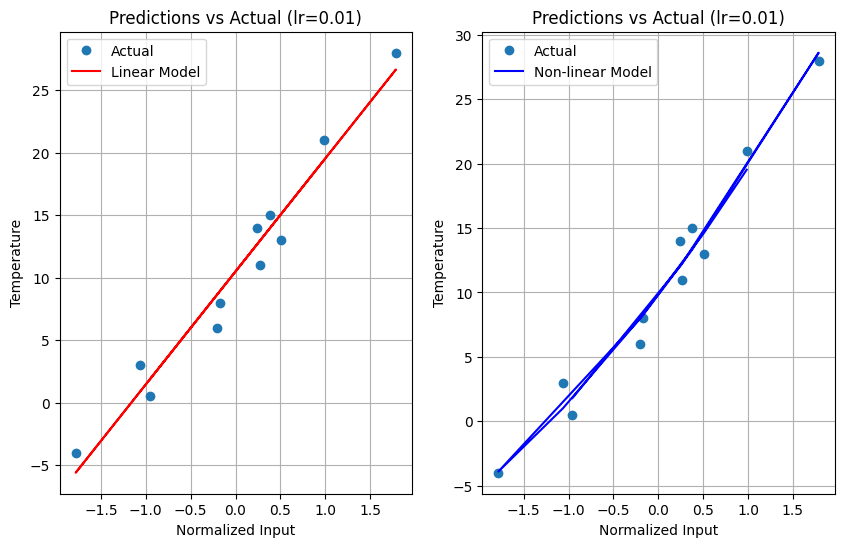

In [221]:
#1c.Pick the best non-linear model and compare your final best loss against the linear model
# Visualize results
plt.figure(figsize=(10, 6))

# Linear Model Plot
plt.subplot(1, 2, 1)
plt.plot(t_u_normalized.numpy(), t_c.numpy(), 'o', label="Actual")
plt.plot(t_u_normalized.numpy(), t_p_linear.numpy(), 'r-', label="Linear Model")
plt.title("Predictions vs Actual (lr=0.01)")
plt.xlabel("Normalized Input")
plt.ylabel("Temperature")
plt.legend()
plt.grid()

# Non-linear Model Plot
plt.subplot(1, 2, 2)
plt.plot(t_u_normalized.numpy(), t_c.numpy(), 'o', label="Actual")
plt.plot(t_u_normalized.numpy(), t_p_nonlinear.numpy(), 'b-', label="Non-linear Model")
plt.title("Predictions vs Actual (lr=0.01)")
plt.xlabel("Normalized Input")
plt.ylabel("Temperature")
plt.legend()
plt.grid()

In [222]:
#Problem 2 (40 pts):
#2a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:
# area, bedrooms, bathrooms, stories, parking

# Load the dataset
URL = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing = pd.read_csv(URL)

# Convert categorical variables to binary
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

# Define input features and target variable
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing['price']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Function to evaluate the model's performance on test data
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test)
        loss = nn.MSELoss()(y_pred, y_test)
        return loss.item()

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        loss = nn.MSELoss()(y_pred, y_test)
        return loss.item()

# Training loop for the linear regression model with different learning rates
def train_model_with_lr(model, X_train, y_train, X_test, y_test, lr, epochs=5000):

    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    best_loss = float('inf')
    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X_train)

        # Compute loss
        loss = loss_fn(y_pred, y_train)

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Report loss every 500 epochs
        if (epoch+1) % 500 == 0:
            # Evaluate validation loss
            validation_loss = evaluate_model(model, X_test, y_test)
            print(f'Epoch {epoch+1}, Training Loss: {loss.item():.1f}, Validation Loss: {validation_loss:.1f}')

            # Track the best model
            if validation_loss < best_loss:
                best_loss = validation_loss
                best_model = model.state_dict()  # Save the best model

    return best_model, best_loss

#2b. Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings).
#Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

# List of learning rates to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
best_models = []
best_losses = []

# Train the model with different learning rates
for lr in learning_rates:
    model = LinearRegression(input_dim=X_train_tensor.shape[1])  # Initialize model
    best_model, best_loss = train_model_with_lr(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, lr)
    best_models.append(best_model)
    best_losses.append(best_loss)

# After training, print the best loss for each learning rate
print('\n')
for lr, loss in zip(learning_rates, best_losses):
    print(f'Best Validation Loss (LR={lr}): {loss:.1f}')


Training with learning rate: 0.1
Epoch 500, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 1000, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 1500, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 2000, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 2500, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 3000, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 3500, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 4000, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 4500, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0
Epoch 5000, Training Loss: 1626007142400.0, Validation Loss: 1173790261248.0

Training with learning rate: 0.01
Epoch 500, Training Loss: 1626007928832.0, Validation Loss: 1173870346240.0
Epoch 1000, Training Loss: 1626007273472.0, Validation Loss: 1173789343744.0
Epoch 150


Training with learning rate: 0.0001
Epoch 500, Training Loss: 21436854960128.0, Validation Loss: 20405588852736.0
Epoch 1000, Training Loss: 17485322518528.0, Validation Loss: 16635332132864.0
Epoch 1500, Training Loss: 14359995613184.0, Validation Loss: 13637969248256.0
Epoch 2000, Training Loss: 11868782460928.0, Validation Loss: 11238692093952.0
Epoch 2500, Training Loss: 9870674755584.0, Validation Loss: 9307926036480.0
Epoch 3000, Training Loss: 8260222976000.0, Validation Loss: 7747846799360.0
Epoch 3500, Training Loss: 6957281312768.0, Validation Loss: 6483426148352.0
Epoch 4000, Training Loss: 5900022054912.0, Validation Loss: 5456311877632.0
Epoch 4500, Training Loss: 5040173481984.0, Validation Loss: 4620599427072.0
Epoch 5000, Training Loss: 4339664683008.0, Validation Loss: 3939852353536.0


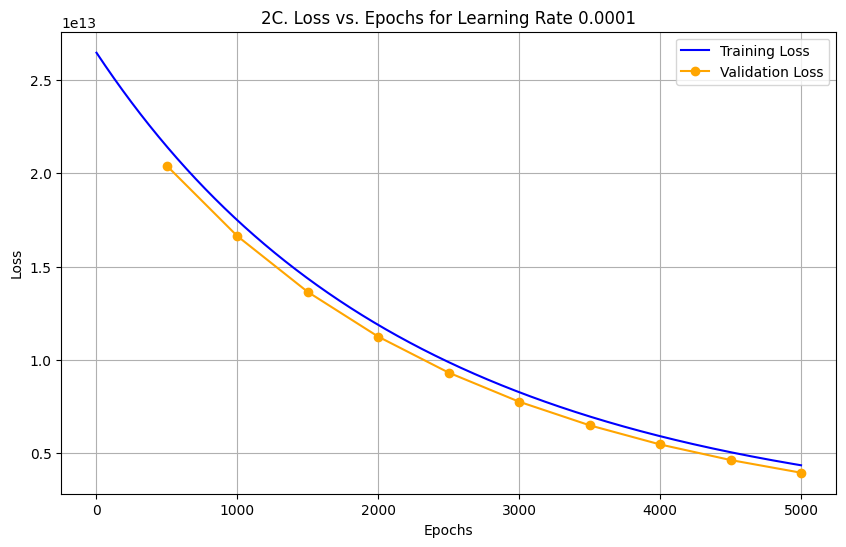

In [230]:
#2C Plot in order to compare results with the linear regression in hw2
def train_model_with_lr(model, X_train, y_train, X_test, y_test, lr, epochs=5000):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    best_loss = float('inf')
    train_losses = []
    val_losses = []

    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X_train)

        # Compute loss
        loss = loss_fn(y_pred, y_train)
        train_losses.append(loss.item())  # Store training loss

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate validation loss
        if (epoch+1) % 500 == 0 or epoch == epochs - 1:
            validation_loss = evaluate_model(model, X_test, y_test)
            val_losses.append(validation_loss)  # Store validation loss
            print(f'Epoch {epoch+1}, Training Loss: {loss.item():.1f}, Validation Loss: {validation_loss:.1f}')
    return best_model, best_loss, train_losses, val_losses

# Train with learning rate = 0.0001 and plot
lr = 0.0001
model = LinearRegression(input_dim=X_train_tensor.shape[1])  # Initialize model
best_model, best_loss, train_losses, val_losses = train_model_with_lr(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, lr
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
# Since we track validation loss every 500 epochs, scale its x-axis appropriately
val_epochs = [i for i in epochs if (i % 500 == 0 or i == len(train_losses))]
plt.plot(val_epochs, val_losses, label='Validation Loss', color='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'2C. Loss vs. Epochs for Learning Rate {lr}')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
#Problem 3 (30 pts):
#3a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:
# all the input features from housing price dataset
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
             'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing['price']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Function to evaluate the model's performance on test data
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test)
        loss = nn.MSELoss()(y_pred, y_test)
        return loss.item()

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        loss = nn.MSELoss()(y_pred, y_test)
        return loss.item()

# Training loop for the linear regression model with different learning rates
def train_model_with_lr(model, X_train, y_train, X_test, y_test, lr, epochs=5000):

    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    best_loss = float('inf')
    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X_train)

        # Compute loss
        loss = loss_fn(y_pred, y_train)

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Report loss every 500 epochs
        if (epoch+1) % 500 == 0:
            # Evaluate validation loss
            validation_loss = evaluate_model(model, X_test, y_test)
            print(f'Epoch {epoch+1}, Training Loss: {loss.item():.1f}, Validation Loss: {validation_loss:.1f}')

            # Track the best model
            if validation_loss < best_loss:
                best_loss = validation_loss
                best_model = model.state_dict()  # Save the best model

    return best_model, best_loss

#3b. Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings).
#Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

# List of learning rates to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000
best_models = []
best_losses = []

# Train the model with different learning rates
for lr in learning_rates:
    model = LinearRegression(input_dim=X_train_tensor.shape[1])  # Initialize model
    best_model, best_loss = train_model_with_lr(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, lr)
    best_models.append(best_model)
    best_losses.append(best_loss)

# After training, print the best loss for each learning rate
print('\n')
for lr, loss in zip(learning_rates, best_losses):
    print(f'Best Validation Loss (LR={lr}): {loss:.1f}')


Training with learning rate: 0.1
Epoch 500, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 1000, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 1500, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 2000, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 2500, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 3000, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 3500, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 4000, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 4500, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0
Epoch 5000, Training Loss: 1196436881408.0, Validation Loss: 968194981888.0

Training with learning rate: 0.01
Epoch 500, Training Loss: 1196440420352.0, Validation Loss: 968287584256.0
Epoch 1000, Training Loss: 1196437012480.0, Validation Loss: 968199372800.0
Epoch 1500, Training 


Training with learning rate: 0.0001
Epoch 500, Training Loss: 21436854960128.0, Validation Loss: 20405588852736.0
Epoch 1000, Training Loss: 17485321469952.0, Validation Loss: 16635331084288.0
Epoch 1500, Training Loss: 14359995613184.0, Validation Loss: 13637969248256.0
Epoch 2000, Training Loss: 11868782460928.0, Validation Loss: 11238691045376.0
Epoch 2500, Training Loss: 9870674755584.0, Validation Loss: 9307926036480.0
Epoch 3000, Training Loss: 8260222976000.0, Validation Loss: 7747845226496.0
Epoch 3500, Training Loss: 6957281312768.0, Validation Loss: 6483426148352.0
Epoch 4000, Training Loss: 5900022054912.0, Validation Loss: 5456311877632.0
Epoch 4500, Training Loss: 5040174530560.0, Validation Loss: 4620599427072.0
Epoch 5000, Training Loss: 4339664683008.0, Validation Loss: 3939852353536.0


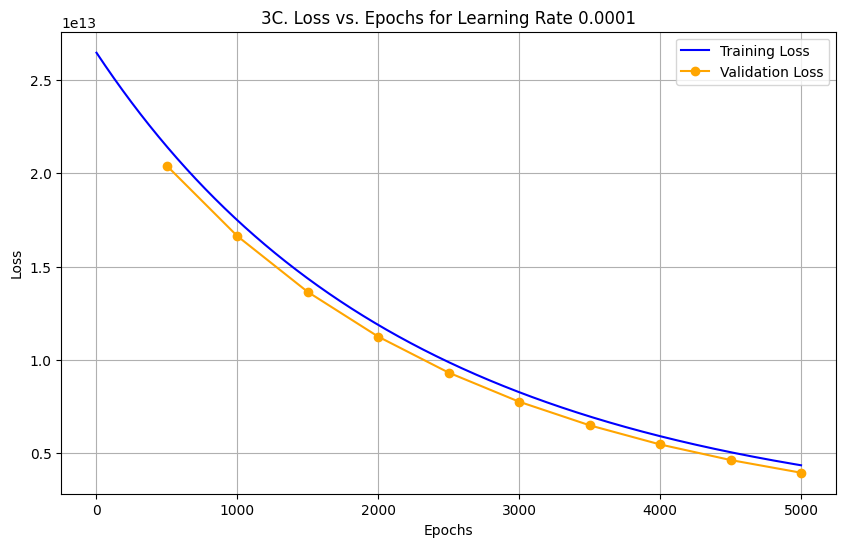

In [229]:
#3C Plot in order to compare results with the linear regression in hw2
def train_model_with_lr(model, X_train, y_train, X_test, y_test, lr, epochs=5000):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    best_loss = float('inf')
    train_losses = []
    val_losses = []

    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X_train)

        # Compute loss
        loss = loss_fn(y_pred, y_train)
        train_losses.append(loss.item())  # Store training loss

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate validation loss
        if (epoch+1) % 500 == 0 or epoch == epochs - 1:
            validation_loss = evaluate_model(model, X_test, y_test)
            val_losses.append(validation_loss)  # Store validation loss
            print(f'Epoch {epoch+1}, Training Loss: {loss.item():.1f}, Validation Loss: {validation_loss:.1f}')

    return best_model, best_loss, train_losses, val_losses

# Train with learning rate = 0.0001 and plot
lr = 0.0001
model = LinearRegression(input_dim=X_train_tensor.shape[1])  # Initialize model
best_model, best_loss, train_losses, val_losses = train_model_with_lr(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, lr
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
# Since we track validation loss every 500 epochs, scale its x-axis appropriately
val_epochs = [i for i in epochs if (i % 500 == 0 or i == len(train_losses))]
plt.plot(val_epochs, val_losses, label='Validation Loss', color='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'3C. Loss vs. Epochs for Learning Rate {lr}')
plt.legend()
plt.grid(True)
plt.show()